In [36]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import h5py

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['figure.dpi'] = 100

plt.style.use("seaborn-colorblind")

/tmp/ipykernel_11755/481946896.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


## Correct pre-processing

In [172]:
folder_path = '/home/melissa.lopez/GlitchBank/LargeAnalysis/O3aGB/FinalData/'
detector = 'L1'

In [173]:
# Define some lists
blip_files, fast_scattering_files, injection_files = list(), list(), list()
koyfish_files, lowfreq_files, tomte_files = list(), list(), list()
whistle_files = list()

# Iterate over all files in the given folder
for filename in np.sort(os.listdir(folder_path)):
    # Check if the file is a CSV file
    if filename.endswith(".csv"):
        #Check what type of data the file contains and put in in the corresponding list.
        if filename.startswith("Blip_" + detector):
            blip_files.append((os.path.join(folder_path, filename)))                     
        elif filename.startswith("Injections_" + detector):
            injection_files.append((os.path.join(folder_path, filename)))       
        elif filename.startswith("Koi_Fish_" + detector):
            koyfish_files.append((os.path.join(folder_path, filename)))
        elif filename.startswith("Low_Frequency_Burst_" + detector):
            lowfreq_files.append((os.path.join(folder_path, filename)))
        elif filename.startswith("Tomte_" + detector):
            tomte_files.append((os.path.join(folder_path, filename)))
        elif filename.startswith("Whistle_" + detector):
            whistle_files.append((os.path.join(folder_path, filename))) 
        elif filename.startswith("Fast_Scattering_" + detector) and (detector != "V1"):
            fast_scattering_files.append((os.path.join(folder_path, filename)))

In [12]:
path = injection_files[0]
df = pd.read_csv(path)

In [113]:
df1_grouped = df.groupby(['Cluster ID', 'Cluster time'])

In [191]:
def averageFeature(cols, group_name, tmp, classes):
    feature = np.zeros((1, len(cols)))

    for c in range(len(cols)-1):
        feature[0, c] = (tmp[cols[c]] * weights).sum() / weights.sum()
    feature[0, len(cols) - 1] = int(classes)
    feature = pd.DataFrame(feature, columns=cols)

    return feature

In [190]:
drop_cols = ['Unnamed: 0', 'ifo', 'Trigger ID', 'Trigger time', 'Cluster ID', 'Cluster time', 'Template ID']
k = 0
cluster_id, cluster_time = list(), list()
for group_name, df_group in df1_grouped:
    print(group_name)
    cluster_id.append(group_name[0])
    cluster_time.append(group_name[1])
    tmp = df_group.sort_values(by='Trigger time')
    time = tmp['Trigger time']
    tmp = tmp.drop(drop_cols, axis=1)
    weights = tmp['SNR'] / np.max(tmp['SNR'])
    print(len(tmp['SNR']), np.mean(tmp['SNR']))
    cols = list(tmp.columns)
    cols.extend(['Class'])
    classes = 0
    feature = averageFeature(cols, group_name, tmp, classes)
    
    if k == 0:
        features = feature
    else:
        features = pd.concat([features, feature])
    k = k + 1
    display(features)
    if k == 2:
        break

IDs = pd.DataFrame({'Cluster ID':cluster_id, 'Cluster time':cluster_time})

(2, 1238166114.4367027)
64 7.5837232859374994


,SNR,Chisq,Mass_1,Mass_2,Spin1z,Spin2z,Class
0,7.850731,2.769055,174.809988,37.57883,-0.28955,0.06697,0.0


(2, 1244451019.3194437)
117 16.27856853931624


,SNR,Chisq,Mass_1,Mass_2,Spin1z,Spin2z,Class
0,7.850731,2.769055,174.809988,37.578830,-0.289550,0.066970,0.0
0,16.747768,3.476546,62.979454,11.773144,-0.483233,-0.055422,0.0


In [192]:
def classTag(file_name):
    if 'Injections' in file_name:
        t = 0
    if 'Blip' in file_name:
        t = 1
    if 'Koi_Fish' in file_name:
        t = 2
    if 'Low_Frequency_Burst' in file_name:
        t = 3
    if 'Tomte' in file_name:
        t = 4
    if 'Whistle' in file_name:
        t = 5
    if 'Fast_Scattering' in file_name:
        t = 6
    return t

In [193]:
file_list = np.sort(os.listdir(folder_path))
for file_name in file_list:
    if detector in file_name:
        t = classTag(file_name)
        print(file_name, t)

Blip_L1_O3a.csv 1
Blip_L1_O3b.csv 1
Fast_Scattering_L1_O3a.csv 6
Fast_Scattering_L1_O3b.csv 6
Injections_L1_O3a.csv 0
Injections_L1_O3b.csv 0
Koi_Fish_L1_O3a.csv 2
Koi_Fish_L1_O3b.csv 2
Low_Frequency_Burst_L1_O3a.csv 3
Low_Frequency_Burst_L1_O3b.csv 3
Tomte_L1_O3a.csv 4
Tomte_L1_O3b.csv 4
Whistle_L1_O3a.csv 5
Whistle_L1_O3b.csv 5


In [174]:
blip_files

['/home/melissa.lopez/GlitchBank/LargeAnalysis/O3aGB/FinalData/Blip_L1_O3a.csv',
 '/home/melissa.lopez/GlitchBank/LargeAnalysis/O3aGB/FinalData/Blip_L1_O3b.csv']

In [ ]:
injection_triggers = read_triggers(injection_files, 0, True)
blip_triggers = read_triggers(blip_files, 1, True)
koyfish_triggers = read_triggers(koyfish_files, 2, True)
lowfreq_triggers = read_triggers(lowfreq_files, 3, True)
tomte_triggers = read_triggers(tomte_files, 4, True)
whistle_triggers = read_triggers(whistle_files, 5, True)
if detector != 'V1':
    fast_scattering_triggers = read_triggers(fast_scattering_files, 6, True)



## Correct boostrap

In [150]:
!ls ../../LargeAnalysis/O3aGB/AvDataFrames/

Av_Blip_L1_O3a.csv		  Av_Koi_Fish_L1_O3b.csv
Av_Blip_L1_O3a_ID.csv		  Av_Koi_Fish_L1_O3b_ID.csv
Av_Blip_L1_O3b.csv		  Av_Low_Frequency_Burst_L1_O3a.csv
Av_Blip_L1_O3b_ID.csv		  Av_Low_Frequency_Burst_L1_O3a_ID.csv
Av_Fast_Scattering_L1_O3a.csv	  Av_Low_Frequency_Burst_L1_O3b.csv
Av_Fast_Scattering_L1_O3a_ID.csv  Av_Low_Frequency_Burst_L1_O3b_ID.csv
Av_Fast_Scattering_L1_O3b.csv	  Av_Tomte_L1_O3a.csv
Av_Fast_Scattering_L1_O3b_ID.csv  Av_Tomte_L1_O3a_ID.csv
Av_Injections_L1_O3a.csv	  Av_Tomte_L1_O3b.csv
Av_Injections_L1_O3a_ID.csv	  Av_Tomte_L1_O3b_ID.csv
Av_Injections_L1_O3b.csv	  Av_Whistle_L1_O3a.csv
Av_Injections_L1_O3b_ID.csv	  Av_Whistle_L1_O3a_ID.csv
Av_Koi_Fish_L1_O3a.csv		  Av_Whistle_L1_O3b.csv
Av_Koi_Fish_L1_O3a_ID.csv	  Av_Whistle_L1_O3b_ID.csv


In [157]:
path_av = '../../LargeAnalysis/O3aGB/AvDataFrames/'
ifo = 'L1'

for file in np.sort(os.listdir(path_av)):
    if (ifo in file) and ('ID' not in file) and ('O3a' in file):
        print(file)
        

Av_Blip_L1_O3a.csv
Av_Fast_Scattering_L1_O3a.csv
Av_Injections_L1_O3a.csv
Av_Koi_Fish_L1_O3a.csv
Av_Low_Frequency_Burst_L1_O3a.csv
Av_Tomte_L1_O3a.csv
Av_Whistle_L1_O3a.csv


In [158]:
!ls ../../LargeAnalysis/O3aGB/AvDataFrames/

Av_Blip_L1_O3a.csv		  Av_Koi_Fish_L1_O3b.csv
Av_Blip_L1_O3a_ID.csv		  Av_Koi_Fish_L1_O3b_ID.csv
Av_Blip_L1_O3b.csv		  Av_Low_Frequency_Burst_L1_O3a.csv
Av_Blip_L1_O3b_ID.csv		  Av_Low_Frequency_Burst_L1_O3a_ID.csv
Av_Fast_Scattering_L1_O3a.csv	  Av_Low_Frequency_Burst_L1_O3b.csv
Av_Fast_Scattering_L1_O3a_ID.csv  Av_Low_Frequency_Burst_L1_O3b_ID.csv
Av_Fast_Scattering_L1_O3b.csv	  Av_Tomte_L1_O3a.csv
Av_Fast_Scattering_L1_O3b_ID.csv  Av_Tomte_L1_O3a_ID.csv
Av_Injections_L1_O3a.csv	  Av_Tomte_L1_O3b.csv
Av_Injections_L1_O3a_ID.csv	  Av_Tomte_L1_O3b_ID.csv
Av_Injections_L1_O3b.csv	  Av_Whistle_L1_O3a.csv
Av_Injections_L1_O3b_ID.csv	  Av_Whistle_L1_O3a_ID.csv
Av_Koi_Fish_L1_O3a.csv		  Av_Whistle_L1_O3b.csv
Av_Koi_Fish_L1_O3a_ID.csv	  Av_Whistle_L1_O3b_ID.csv


In [171]:
np.load('../../LargeAnalysis/O3aGB/AvDataFrames/dataset_all_L1_bootstrap_O3a.npy')[:,-1]

array([-0.58485679,  0.2800241 ,  0.89622325, ..., -0.42957601,
        0.25144339,  0.04702031])

In [ ]:
injections = np.load("../datasets/injection_triggers_" + detector + ".npy").tolist()
blips = np.load("../datasets/blip_triggers_" + detector + ".npy").tolist()
koyfishes = np.load("../datasets/koyfish_triggers_" + detector + ".npy").tolist()
lowfreqs = np.load("../datasets/lowfreq_triggers_" + detector + ".npy").tolist()
tomtes = np.load("../datasets/tomte_triggers_" + detector + ".npy").tolist()
whistles = np.load("../datasets/whistle_triggers_" + detector + ".npy").tolist()

In [194]:
np.ones(2)

array([1., 1.])

In [7]:
import os
from datetime import datetime

def string_to_hours(time_string):
    # Specify the format of the time string
    format_string = "%H:%M:%S"  # Adjust the format according to your string

    # Create a reference date to combine with the time string
    reference_date = datetime.strptime("00:00:00", "%H:%M:%S").date()

    # Parse the time string into a datetime object
    time_obj = datetime.strptime(time_string, format_string).time()

    # Combine the time object with the reference date
    combined_datetime = datetime.combine(reference_date, time_obj)

    # Calculate the time difference in hours from the reference date
    time_diff = combined_datetime - datetime.combine(reference_date, datetime.min.time())
    time_diff_hours = time_diff.total_seconds() / 3600

    return time_diff_hours



In [8]:
paths = ['/home/melissa.lopez/BayesWave/O3a/L1/Blip/pcdev_run/',
'/home/melissa.lopez/BayesWave/O3a/L1/Blip/pcdev_run_chunk2/',
'/home/melissa.lopez/BayesWave/O3a/L1/Blip/pcdev_run_fix/',
'/home/paloma.laguarta/BayesWave/O3a/L1/Tomte/chunk1/',
'/home/melissa.lopez/BayesWave/O3a/L1/Tomte/chunk2/',
'/home/paloma.laguarta/BayesWave/O3a/L1/Tomte/chunk3/',
'/home/melissa.lopez/BayesWave/O3a/L1/Tomte/chunk4/',
'/home/paloma.laguarta/BayesWave/O3a/L1/Tomte/chunk5/',
'/home/melissa.lopez/BayesWave/O3a/L1/Tomte/chunk6/',
'/home/paloma.laguarta/BayesWave/O3a/L1/Tomte/chunk7/',
'/home/melissa.lopez/BayesWave/O3a/L1/Tomte/chunk8/',
'/home/paloma.laguarta/BayesWave/O3a/L1/Tomte/chunk9/',
'/home/melissa.lopez/BayesWave/O3a/L1/Tomte/chunk10/',
'/home/paloma.laguarta/BayesWave/O3a/L1/Tomte/chunk11/',
'/home/melissa.lopez/BayesWave/O3a/L1/Tomte/chunk12/',
'/home/paloma.laguarta/BayesWave/O3a/L1/Tomte/chunk13/',
'/home/melissa.lopez/BayesWave/O3a/L1/Tomte/chunk14/',
'/home/melissa.lopez/BayesWave/O3a/L1/Tomte/chunk16/',
'/home/melissa.lopez/BayesWave/O3a/L1/Tomte/chunk18/',
'/home/melissa.lopez/BayesWave/O3a/L1/Tomte/chunk20/',
'/home/melissa.lopez/BayesWave/O3a/L1/KoiFish/osg_run_chunk1/',
'/home/melissa.lopez/BayesWave/O3a/L1/KoiFish/chunk2/',
'/home/melissa.lopez/BayesWave/O3a/L1/KoiFish/osg_run_chunk3/',
'/home/melissa.lopez/BayesWave/O3a/L1/KoiFish/chunk4/']

hours = 0
for p in paths:
    list_files = os.listdir(p)
    for files in list_files:
        if ('dag.nodes.log' in files) and (not files.endswith('swp')):
            with open(p + files, 'r') as file:
                # Read the contents of the log file line by line
                for i, line in enumerate(file):
                    if 'Total Remote Usage' in line:
                        #print(line.strip()[6:14])
                        hours += string_to_hours(line.strip()[6:14])   
hours

361130.2766666625

### Sarah's plot

In [ ]:
def read_templates(path_to_templates):
    """
    This function is used to read the template bank
    
    Input
    ----
    path_to_templates: location of the data
    
    Output
    -----
    df: data frame containing the data
    """

    hf = h5py.File(path_to_templates, 'r')
    row=0; #counter of rows
    ids= list(); mass1= list(); mass2 = list(); spin1z = list(); spin2z = list()
    for k in hf.keys():
            n1 = hf.get(k)
            n2 = (np.array(n1))

            ids.append(np.asarray(k, dtype=np.float32));
            mass1.append(n2[0][0])
            mass2.append(n2[0][1])
            spin1z.append(n2[0][2])
            spin2z.append(n2[0][3])

    df=pd.DataFrame({'Trigger IDs': np.asarray(ids, dtype=int), 'Mass_1': mass1, 'Mass_2': mass2,'Spin1z': spin1z, 'Spin2z': spin2z})
    return df

In [29]:
template_bank = read_templates('../../../../ML_projects/Projects_2021/Project_2/Data/template_bank.hdf5')

In [30]:
template_bank.columns

Index(['Trigger IDs', 'Mass_1', 'Mass_2', 'Spin1z', 'Spin2z'], dtype='object')

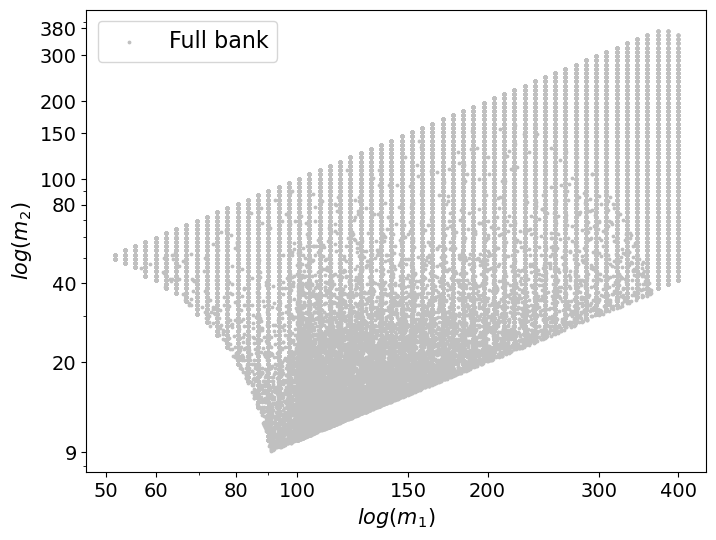

In [45]:
m1label = [50,60, 80,100,150, 200, 300, 400]
m2label = [9,20, 40, 80, 100,150, 200, 300, 380]

fig, axs = plt.subplots(dpi=100)
axs.scatter(template_bank['Mass_1'], template_bank['Mass_2'], s=3, c='silver', label='Full bank')
axs.set_xscale('log'), axs.set_yscale('log')
axs.set_xticks(m1label), axs.set_yticks(m2label)
axs.set_xticklabels(m1label), axs.set_yticklabels(m2label)
axs.tick_params(axis='both', which='major', labelsize=14)
axs.set_xlabel(r'$log(m_1)$', fontsize=15), axs.set_ylabel(r'$log(m_2)$', fontsize=15)
axs.legend(loc='upper left',prop={'size': 16})

In [53]:
!ls ../../../GlitchBank/sqlites/

gstlal_inspiral_allifo_chunk23.sqlite
gstlal_inspiral_allifo_chunk24.cache
gstlal_inspiral_allifo_chunk24_cut.cache
gstlal_inspiral_allifo_chunk24.sqlite
gstlal_inspiral_allifo_chunk25.sqlite
gstlal_inspiral_allifo_chunk26.sqlite
gstlal_inspiral_allifo_chunk30.sqlite
gstlal_inspiral_allifo_chunk40.cache
gstlal_inspiral_allifo_chunk40_cut.cache
gstlal_inspiral_allifo_chunk40.sqlite
gstlal_inspiral_inj_allifo_chunk23.sqlite
gstlal_inspiral_inj_allifo_chunk24.cache
gstlal_inspiral_inj_allifo_chunk24_cut.cache
gstlal_inspiral_inj_allifo_chunk24.sqlite
gstlal_inspiral_inj_allifo_chunk25.sqlite
gstlal_inspiral_inj_allifo_chunk26.sqlite
gstlal_inspiral_inj_allifo_chunk30.sqlite
gstlal_inspiral_inj_allifo_chunk40.cache
gstlal_inspiral_inj_allifo_chunk40_cut.cache
gstlal_inspiral_inj_allifo_chunk40.sqlite
trash


In [ ]:
folder_path = '/home/melissa.lopez/GlitchBank/LargeAnalysis/O3aGB/FinalData/'
